In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return predictions



In [4]:
def evaluate_knn(k_values):
    accuracies = []
    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"K={k}, Accuracy={accuracy*100:.2f}%")
    return accuracies


k_values = range(1, 21)


accuracies = evaluate_knn(k_values)

K=1, Accuracy=100.00%
K=2, Accuracy=100.00%
K=3, Accuracy=100.00%
K=4, Accuracy=100.00%
K=5, Accuracy=100.00%
K=6, Accuracy=100.00%
K=7, Accuracy=96.67%
K=8, Accuracy=100.00%
K=9, Accuracy=100.00%
K=10, Accuracy=100.00%
K=11, Accuracy=100.00%
K=12, Accuracy=100.00%
K=13, Accuracy=100.00%
K=14, Accuracy=100.00%
K=15, Accuracy=100.00%
K=16, Accuracy=100.00%
K=17, Accuracy=100.00%
K=18, Accuracy=100.00%
K=19, Accuracy=100.00%
K=20, Accuracy=100.00%


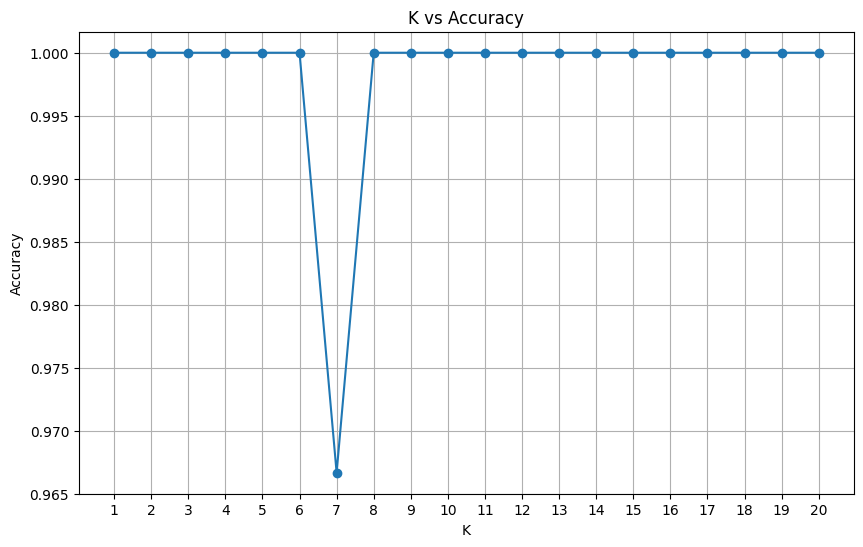

(array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 1.0,
 1)

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


best_k = k_values[np.argmax(accuracies)]
y_pred_best_k = knn(X_train, y_train, X_test, best_k)
conf_matrix = confusion_matrix(y_test, y_pred_best_k)
accuracy_best_k = accuracy_score(y_test, y_pred_best_k)

conf_matrix, accuracy_best_k, best_k